# Import Libraries

**Import the usual libraries **

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

# Module 7: Loan Eligibility Case Study

Here are what the data represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

** not.fully.paid: This is the output field. Please note that 1 means borrower is not going to pay the loan completely** 

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [10]:
loans = pd.read_csv('loan_borowwer_data.csv')

** Check out the info(), head(), and describe() methods on loans.**

In [11]:
loans.info()
# Should have 9578 records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1010.2+ KB


In [12]:
loans.describe()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>credit.policy</th>
      <th>int.rate</th>
      <th>installment</th>
      <th>log.annual.inc</th>
      <th>dti</th>
      <th>fico</th>
      <th>days.with.cr.line</th>
      <th>revol.bal</th>
      <th>revol.util</th>
      <th>inq.last.6mths</th>
      <th>delinq.2yrs</th>
      <th>pub.rec</th>
      <th>not.fully.paid</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>9578.000000</td>
      <td>9578.000000</td>
      <td>9578.000000</td>
      <td>9578.000000</td>
      <td>9578.000000</td>
      <td>9578.000000</td>
      <td>9578.000000</td>
      <td>9.578000e+03</td>
      <td>9578.000000</td>
      <td>9578.000000</td>
      <td>9578.000000</td>
      <td>9578.000000</td>
      <td>9578.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>0.804970</td>
      <td>0.122640</td>
      <td>319.089413</td>
      <td>10.932117</td>
      <td>12.606679</td>
      <td>710.846314</td>
      <td>4560.767197</td>
      <td>1.691396e+04</td>
      <td>46.799236</td>
      <td>1.577469</td>
      <td>0.163708</td>
      <td>0.062122</td>
      <td>0.160054</td>
    </tr>
    <tr>
      <th>std</th>
      <td>0.396245</td>
      <td>0.026847</td>
      <td>207.071301</td>
      <td>0.614813</td>
      <td>6.883970</td>
      <td>37.970537</td>
      <td>2496.930377</td>
      <td>3.375619e+04</td>
      <td>29.014417</td>
      <td>2.200245</td>
      <td>0.546215</td>
      <td>0.262126</td>
      <td>0.366676</td>
    </tr>
    <tr>
      <th>min</th>
      <td>0.000000</td>
      <td>0.060000</td>
      <td>15.670000</td>
      <td>7.547502</td>
      <td>0.000000</td>
      <td>612.000000</td>
      <td>178.958333</td>
      <td>0.000000e+00</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>1.000000</td>
      <td>0.103900</td>
      <td>163.770000</td>
      <td>10.558414</td>
      <td>7.212500</td>
      <td>682.000000</td>
      <td>2820.000000</td>
      <td>3.187000e+03</td>
      <td>22.600000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>1.000000</td>
      <td>0.122100</td>
      <td>268.950000</td>
      <td>10.928884</td>
      <td>12.665000</td>
      <td>707.000000</td>
      <td>4139.958333</td>
      <td>8.596000e+03</td>
      <td>46.300000</td>
      <td>1.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>1.000000</td>
      <td>0.140700</td>
      <td>432.762500</td>
      <td>11.291293</td>
      <td>17.950000</td>
      <td>737.000000</td>
      <td>5730.000000</td>
      <td>1.824950e+04</td>
      <td>70.900000</td>
      <td>2.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>max</th>
      <td>1.000000</td>
      <td>0.216400</td>
      <td>940.140000</td>
      <td>14.528354</td>
      <td>29.960000</td>
      <td>827.000000</td>
      <td>17639.958330</td>
      <td>1.207359e+06</td>
      <td>119.000000</td>
      <td>33.000000</td>
      <td>13.000000</td>
      <td>5.000000</td>
      <td>1.000000</td>
    </tr>
  </tbody>
</table>
</div>

In [13]:
loans.head()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>credit.policy</th>
      <th>purpose</th>
      <th>int.rate</th>
      <th>installment</th>
      <th>log.annual.inc</th>
      <th>dti</th>
      <th>fico</th>
      <th>days.with.cr.line</th>
      <th>revol.bal</th>
      <th>revol.util</th>
      <th>inq.last.6mths</th>
      <th>delinq.2yrs</th>
      <th>pub.rec</th>
      <th>not.fully.paid</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>debt_consolidation</td>
      <td>0.1189</td>
      <td>829.10</td>
      <td>11.350407</td>
      <td>19.48</td>
      <td>737</td>
      <td>5639.958333</td>
      <td>28854</td>
      <td>52.1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>credit_card</td>
      <td>0.1071</td>
      <td>228.22</td>
      <td>11.082143</td>
      <td>14.29</td>
      <td>707</td>
      <td>2760.000000</td>
      <td>33623</td>
      <td>76.7</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>debt_consolidation</td>
      <td>0.1357</td>
      <td>366.86</td>
      <td>10.373491</td>
      <td>11.63</td>
      <td>682</td>
      <td>4710.000000</td>
      <td>3511</td>
      <td>25.6</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>debt_consolidation</td>
      <td>0.1008</td>
      <td>162.34</td>
      <td>11.350407</td>
      <td>8.10</td>
      <td>712</td>
      <td>2699.958333</td>
      <td>33667</td>
      <td>73.2</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1</td>
      <td>credit_card</td>
      <td>0.1426</td>
      <td>102.92</td>
      <td>11.299732</td>
      <td>14.97</td>
      <td>667</td>
      <td>4066.000000</td>
      <td>4740</td>
      <td>39.5</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>

# Exploratory Data Analysis

Let's do some data visualization!

** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

Text(0.5,0,'FICO')

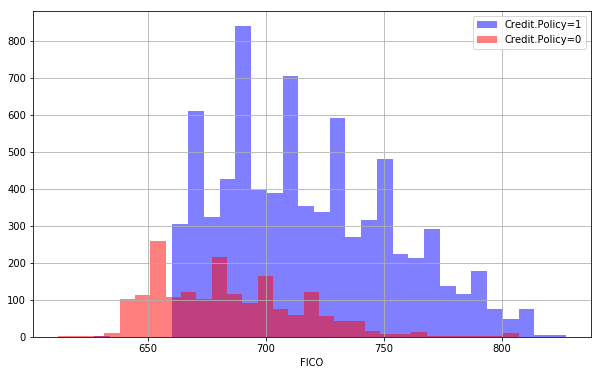

In [14]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

** Create a similar figure, except this time select by the not.fully.paid column.**

Text(0.5,0,'FICO')

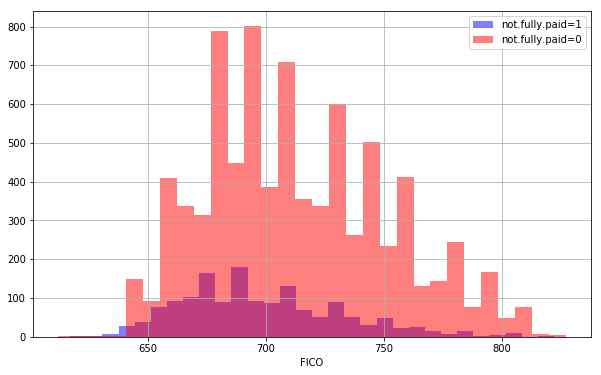

In [15]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

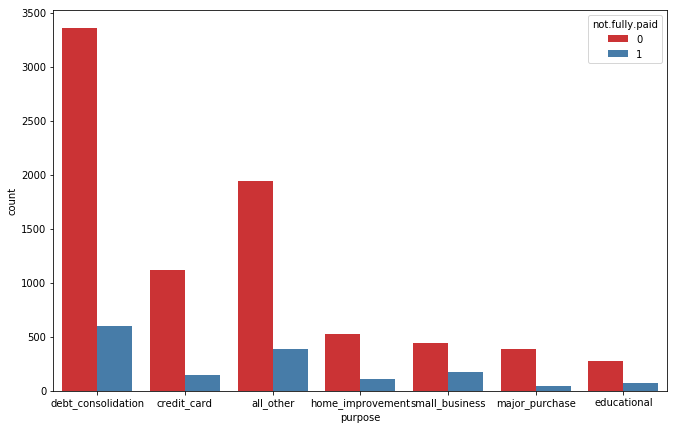

In [16]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

# Setting up the Data

Let's get ready to set up our data for our  Classification Model!

**Check loans.info() again.**

In [17]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1010.2+ KB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [18]:
cat_feats = ['purpose']

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [19]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [20]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

** Each of the feild purpose_* will have value 0 or 1 based on the category **

## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

# Drop the not.fully.paid column as it is the output column and Not A Feature
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
# Remember the significance of random_state value

In [21]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [22]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [23]:
dtree = DecisionTreeClassifier()

In [24]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [25]:
predictions = dtree.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      0.82      0.84      2431
          1       0.19      0.23      0.21       443

avg / total       0.75      0.73      0.74      2874



** Q1. Which model has a better avg. precision score ( Refer to score from Random Forest Also) ?
<br>Q2. Which model has a better recall score for prediction value 0 ( Refer to score from Random Forest Also) ?**


In [28]:
print(confusion_matrix(y_test,predictions))

[[1993  438]
 [ 340  103]]


## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rfc = RandomForestClassifier(n_estimators=600)

In [37]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [90]:
predictions = rfc.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [91]:
from sklearn.metrics import classification_report,confusion_matrix

In [92]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.62      0.02      0.04       443

avg / total       0.81      0.85      0.78      2874



**Show the Confusion Matrix for the predictions.**

In [93]:
print(confusion_matrix(y_test,predictions))

[[2425    6]
 [ 433   10]]


** Q3. What performed better the random forest or the decision tree for lower NPAs ? **

# Decision Tree